In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('../price_index_data.csv', index_col='Date', parse_dates=True)

df.index.freq= 'MS'

In [3]:
df.head()

,Gram,Arhar,Moong,Masur,Urad
Date,,,,,
1994-04-01,32.83,35.10,25.21,28.99,28.64
1994-05-01,33.48,34.55,25.42,28.84,30.09
1994-06-01,33.19,35.24,25.03,30.31,29.96
1994-07-01,34.65,36.14,23.92,32.58,31.39
1994-08-01,37.51,36.86,23.66,33.79,32.48


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 324 entries, 1994-04-01 to 2021-03-01
Freq: MS
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gram    324 non-null    float64
 1   Arhar   324 non-null    float64
 2   Moong   324 non-null    float64
 3   Masur   324 non-null    float64
 4   Urad    324 non-null    float64
dtypes: float64(5)
memory usage: 15.2 KB


# Descriptive statistics

<AxesSubplot:xlabel='Date'>

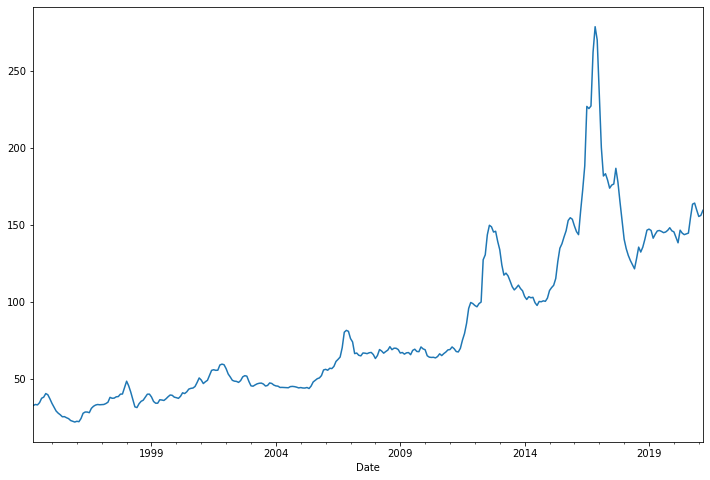

In [5]:
df['Gram'].plot(figsize=(12,8))

In [6]:
df['Gram'].describe()

count    324.000000
mean      82.484074
std       50.801346
min       22.070000
25%       44.437500
50%       66.045000
75%      119.500000
max      278.900000
Name: Gram, dtype: float64

In [7]:
df['Gram'].skew()

1.142893809385681

In [8]:
df['Gram'].kurtosis()

0.9154265077909178

## Decompose the series

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [10]:
decompose = seasonal_decompose(df['Gram'], model='add')

In [11]:
decompose.seasonal

Date
1994-04-01   -4.161039
1994-05-01   -2.836199
1994-06-01   -2.477337
1994-07-01    0.071461
1994-08-01    1.036413
                ...   
2020-11-01    5.104137
2020-12-01    3.738865
2021-01-01    0.569730
2021-02-01   -2.803315
2021-03-01   -4.881295
Freq: MS, Name: seasonal, Length: 324, dtype: float64

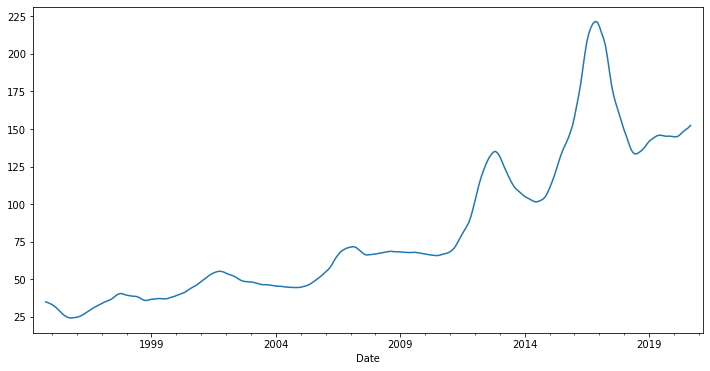

In [12]:
decompose.trend.plot(figsize=(12,6));

<AxesSubplot:>

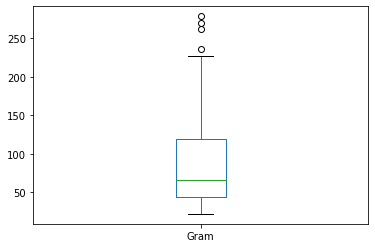

In [13]:
df['Gram'].plot.box()

# Time series modeling

# Stationarity test

A stationary process has the property that the mean, variance and autocorrelation structure do not change over time.

> $H_0$ : Series is unitroot or non stationary,
>> $H_1$ : Series is stationary

<AxesSubplot:xlabel='Date'>

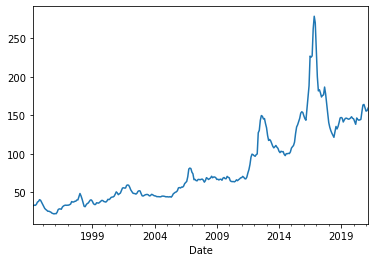

In [14]:
df['Gram'].plot()

In [15]:
from arch.unitroot import ADF, KPSS, PhillipsPerron

In [16]:
PhillipsPerron(df['Gram'])

Test Statistic,-1.182
P-value,0.681
Lags,17


In [17]:
ADF(df['Gram'])

Test Statistic,-1.444
P-value,0.561
Lags,11


#### 1st diff

In [18]:
df_diff = df['Gram'].diff(periods=1).iloc[1:]

In [19]:
df_diff.head()

Date
1994-05-01    0.65
1994-06-01   -0.29
1994-07-01    1.46
1994-08-01    2.86
1994-09-01    0.72
Freq: MS, Name: Gram, dtype: float64

In [20]:
PhillipsPerron(df_diff)

Test Statistic,-9.438
P-value,0.000
Lags,17


In [21]:
df_diff.head()

Date
1994-05-01    0.65
1994-06-01   -0.29
1994-07-01    1.46
1994-08-01    2.86
1994-09-01    0.72
Freq: MS, Name: Gram, dtype: float64

In [22]:
ADF(df_diff)

Test Statistic,-4.506
P-value,0.000
Lags,10


##### In diff. 1, the data series are in stationary.

<AxesSubplot:xlabel='Date'>

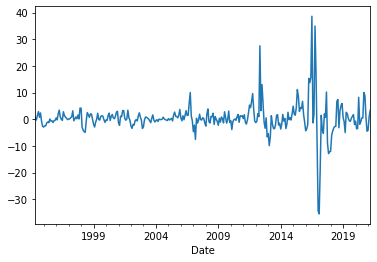

In [23]:
df_diff.plot()

## ACF and PACF plot

>**Autocorrelation** represents the degree of similarity between a given time series and a lagged version of itself over successive time intervals.

> **Partial Autocorrelation** is a conditional correlation.

In [24]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

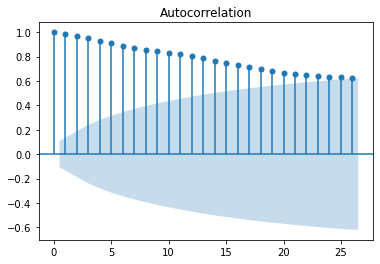

In [25]:
plot_acf(df['Gram']); # q order

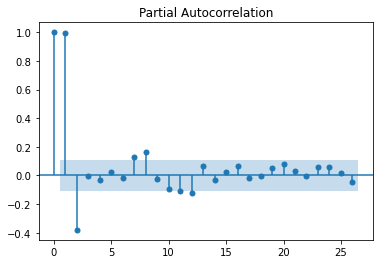

In [26]:
plot_pacf(df['Gram']); # p order

# AUTO ARIMA

In [27]:
from pmdarima import auto_arima

In [28]:
stepwise_fit = auto_arima(df['Gram'], start_p=0,start_q=0, max_p=6,max_q=3, m=12, seasonal=False, trace=True)

Fit ARIMA: order=(0, 1, 0); AIC=2043.421, BIC=2050.976, Fit time=0.010 seconds
Fit ARIMA: order=(1, 1, 0); AIC=1947.821, BIC=1959.154, Fit time=0.027 seconds
Fit ARIMA: order=(0, 1, 1); AIC=1949.852, BIC=1961.185, Fit time=0.035 seconds
Fit ARIMA: order=(2, 1, 0); AIC=1945.277, BIC=1960.388, Fit time=0.048 seconds
Fit ARIMA: order=(2, 1, 1); AIC=1945.230, BIC=1964.118, Fit time=0.151 seconds
Fit ARIMA: order=(3, 1, 2); AIC=1940.386, BIC=1966.830, Fit time=0.423 seconds
Fit ARIMA: order=(2, 1, 2); AIC=1947.079, BIC=1969.745, Fit time=0.159 seconds
Fit ARIMA: order=(4, 1, 2); AIC=1941.612, BIC=1971.834, Fit time=0.452 seconds
Fit ARIMA: order=(3, 1, 1); AIC=1946.996, BIC=1969.662, Fit time=0.231 seconds
Fit ARIMA: order=(3, 1, 3); AIC=1941.976, BIC=1972.197, Fit time=0.423 seconds
Fit ARIMA: order=(4, 1, 3); AIC=1936.538, BIC=1970.537, Fit time=2.709 seconds
Fit ARIMA: order=(5, 1, 3); AIC=1948.893, BIC=1986.670, Fit time=0.496 seconds
Total fit time: 5.169 seconds


In [29]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  323
Model:                 ARIMA(4, 1, 3)   Log Likelihood                -959.269
Method:                       css-mle   S.D. of innovations              4.687
Date:                Sat, 03 Jul 2021   AIC                           1936.538
Time:                        10:23:26   BIC                           1970.537
Sample:                             1   HQIC                          1950.110
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4581      0.070      6.566      0.000       0.321       0.595
ar.L1.D.y      0.0569      0.054      1.057      0.290      -0.049       0.162
ar.L2.D.y      0.6532      0.041     15.954      0.000       0.573       0.733
ar.L3.D.y      0.6543      0.043     15.283      0.000       0.570       0.738
ar.L4.D.y     -0.4884      0.053     -9.161      0.000      -0.593      -0.384
ma.L1.D.y      0.4885      0.030     16.471      0.000       0.430       0.547
ma.L2.D.y     -0.5216      0.027    -18.995      0.000      -0.575      -0.468
ma.L3.D.y     -0.9668      0.025    -38.753      0.000      -1.016      -0.918
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.7577           -0.6993j            1.0311           -0.3814
AR.2           -0.7577           +0.6993j            1.0311            0.3814
AR.3            1.0932           -0.0000j            1.0932           -0.0000
AR.4            1.7616           -0.0000j            1.7616           -0.0000
MA.1            1.0000           -0.0000j            1.0000           -0.0000
MA.2           -0.7698           -0.6646j            1.0170           -0.3866
MA.3           -0.7698           +0.6646j            1.0170            0.3866
-----------------------------------------------------------------------------
"""

In [30]:
from statsmodels.tsa.arima_model import ARIMA, ARIMAResults

In [31]:
from statsmodels.tsa.statespace.sarimax import SARIMAX, SARIMAXResults

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 324 entries, 1994-04-01 to 2021-03-01
Freq: MS
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gram    324 non-null    float64
 1   Arhar   324 non-null    float64
 2   Moong   324 non-null    float64
 3   Masur   324 non-null    float64
 4   Urad    324 non-null    float64
dtypes: float64(5)
memory usage: 15.2 KB


In [33]:
324-12

312

In [34]:
train = df.iloc[:312]
test = df.iloc[312:]

In [35]:
len(test)

12

In [36]:
train.tail()

,Gram,Arhar,Moong,Masur,Urad
Date,,,,,
2019-11-01,148.3,153.6,146.7,140.5,162.1
2019-12-01,146.3,154.6,149.6,143.2,177.0
2020-01-01,145.6,152.0,151.3,147.9,180.9
2020-02-01,142.0,152.8,156.6,147.1,179.6
2020-03-01,138.5,150.9,162.0,146.0,176.9


In [37]:
test.head()

,Gram,Arhar,Moong,Masur,Urad
Date,,,,,
2020-04-01,146.7,155.7,174.2,149.7,180.6
2020-05-01,144.8,157.0,179.7,150.8,187.7
2020-06-01,143.8,158.6,176.1,155.1,184.0
2020-07-01,144.3,160.1,173.6,157.5,181.7
2020-08-01,144.8,160.9,170.4,158.0,180.9


## ARIMA Model for Gram


ARIMA(p,d,q)

In [38]:
model_gram = ARIMA(train['Gram'], order=(4,1,3))

result_gram = model_gram.fit()
result_gram.summary()

/Users/soumikray/Documents/Python/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                 D.Gram   No. Observations:                  311
Model:                 ARIMA(4, 1, 3)   Log Likelihood                -922.963
Method:                       css-mle   S.D. of innovations              4.671
Date:                Sat, 03 Jul 2021   AIC                           1863.927
Time:                        10:23:31   BIC                           1897.585
Sample:                    05-01-1994   HQIC                          1877.380
                         - 03-01-2020                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.4435      0.077      5.789      0.000       0.293       0.594
ar.L1.D.Gram     0.0439      0.056      0.780      0.435      -0.066       0.154
ar.L2.D.Gram     0.6874      0.043     15.814      0.000       0.602       0.773
ar.L3.D.Gram     0.6333      0.040     15.888      0.000       0.555       0.711
ar.L4.D.Gram    -0.4851      0.052     -9.277      0.000      -0.588      -0.383
ma.L1.D.Gram     0.5194      0.030     17.461      0.000       0.461       0.578
ma.L2.D.Gram    -0.5368      0.021    -25.479      0.000      -0.578      -0.495
ma.L3.D.Gram    -0.9824      0.033    -30.145      0.000      -1.046      -0.919
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.7733           -0.6894j            1.0360           -0.3841
AR.2           -0.7733           +0.6894j            1.0360            0.3841
AR.3            1.0901           -0.0000j            1.0901           -0.0000
AR.4            1.7620           -0.0000j            1.7620           -0.0000
MA.1            1.0001           -0.0000j            1.0001           -0.0000
MA.2           -0.7732           -0.6481j            1.0089           -0.3890
MA.3           -0.7732           +0.6481j            1.0089            0.3890
-----------------------------------------------------------------------------
"""

In [39]:
prediction_gram = result_gram.predict(start=len(train),end=len(train)+len(test)-1, typ='levels').rename('ARIMA(4,1,3)-predictions')

In [40]:
prediction_gram

2020-04-01    136.669344
2020-05-01    136.558448
2020-06-01    137.535633
2020-07-01    138.094302
2020-08-01    139.661767
2020-09-01    140.840682
2020-10-01    141.903097
2020-11-01    143.535162
2020-12-01    144.376773
2021-01-01    145.689919
2021-02-01    146.897699
2021-03-01    147.648079
Freq: MS, Name: ARIMA(4,1,3)-predictions, dtype: float64

In [41]:
test['ARIMA_predistion']= prediction_gram

<AxesSubplot:title={'center':'True prediction_ARIMA'}, xlabel='Date'>

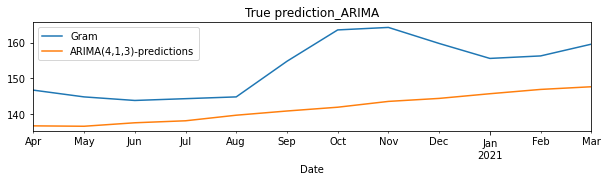

In [42]:
test['Gram'].plot(figsize=(10,2), legend=True, title='True prediction_ARIMA')
prediction_gram.plot(legend=True)

## Error estimation

In [43]:
from statsmodels.tools.eval_measures import rmse, mse

In [44]:
rmse(test['Gram'],prediction_gram)

12.704413905022927

In [45]:
mse(test['Gram'],prediction_gram)

161.40213267013988

In [46]:
test['Gram'].mean()

153.19999999999996

In [47]:
prediction_gram.mean()

141.61757559228852

# Final Model Forecasting

In [48]:
FinalModel_gram = ARIMA(df['Gram'], order=(4,1,3))

FinalResult_gram = FinalModel_gram.fit()

In [49]:
FinalResult_gram.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                 D.Gram   No. Observations:                  323
Model:                 ARIMA(4, 1, 3)   Log Likelihood                -959.269
Method:                       css-mle   S.D. of innovations              4.687
Date:                Sat, 03 Jul 2021   AIC                           1936.538
Time:                        10:23:34   BIC                           1970.537
Sample:                    05-01-1994   HQIC                          1950.110
                         - 03-01-2021                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.4581      0.070      6.566      0.000       0.321       0.595
ar.L1.D.Gram     0.0569      0.054      1.057      0.290      -0.049       0.162
ar.L2.D.Gram     0.6532      0.041     15.954      0.000       0.573       0.733
ar.L3.D.Gram     0.6543      0.043     15.283      0.000       0.570       0.738
ar.L4.D.Gram    -0.4884      0.053     -9.161      0.000      -0.593      -0.384
ma.L1.D.Gram     0.4885      0.030     16.471      0.000       0.430       0.547
ma.L2.D.Gram    -0.5216      0.027    -18.995      0.000      -0.575      -0.468
ma.L3.D.Gram    -0.9668      0.025    -38.753      0.000      -1.016      -0.918
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.7577           -0.6993j            1.0311           -0.3814
AR.2           -0.7577           +0.6993j            1.0311            0.3814
AR.3            1.0932           -0.0000j            1.0932           -0.0000
AR.4            1.7616           -0.0000j            1.7616           -0.0000
MA.1            1.0000           -0.0000j            1.0000           -0.0000
MA.2           -0.7698           -0.6646j            1.0170           -0.3866
MA.3           -0.7698           +0.6646j            1.0170            0.3866
-----------------------------------------------------------------------------
"""

In [50]:
forecast_gram = FinalResult_gram.predict(start=len(df),end=len(df)+47 , typ='levels').rename('ARIMA(4,1,3)-forecast')

<AxesSubplot:xlabel='Date'>

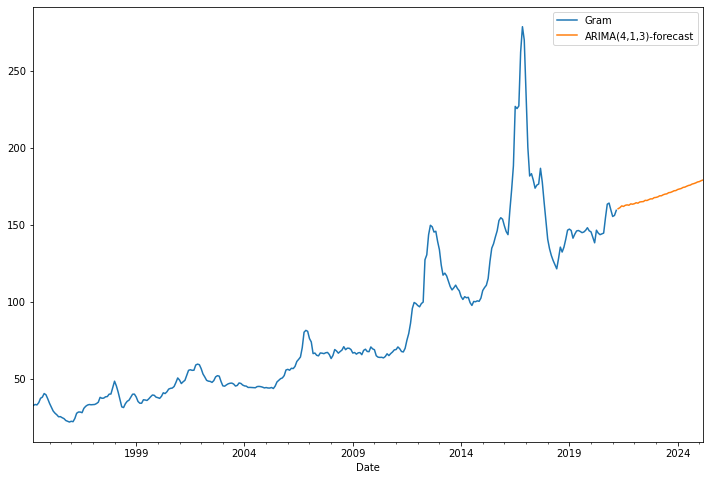

In [51]:
df['Gram'].plot(figsize=(12,8),legend=True)
forecast_gram.plot(legend=True)

In [52]:
print(forecast_gram)

2021-04-01    160.628461
2021-05-01    161.330956
2021-06-01    162.483172
2021-07-01    162.125491
2021-08-01    162.871828
2021-09-01    163.148261
2021-10-01    162.911520
2021-11-01    163.798443
2021-12-01    163.567470
2022-01-01    163.900559
2022-02-01    164.521412
2022-03-01    164.246840
2022-04-01    165.024310
2022-05-01    165.189579
2022-06-01    165.280756
2022-07-01    166.093513
2022-08-01    165.984563
2022-09-01    166.544993
2022-10-01    167.049796
2022-11-01    167.033167
2022-12-01    167.838660
2023-01-01    167.987034
2023-02-01    168.320995
2023-03-01    169.028883
2023-04-01    169.047797
2023-05-01    169.714105
2023-06-01    170.121255
2023-07-01    170.303098
2023-08-01    171.062925
2023-09-01    171.222728
2023-10-01    171.705060
2023-11-01    172.302041
2023-12-01    172.441334
2024-01-01    173.133545
2024-02-01    173.475765
2024-03-01    173.803760
2024-04-01    174.487646
2024-05-01    174.683453
2024-06-01    175.245569
2024-07-01    175.749537


# Kolmogorov-Smirnov test for goodness of fit. Normality of residuals

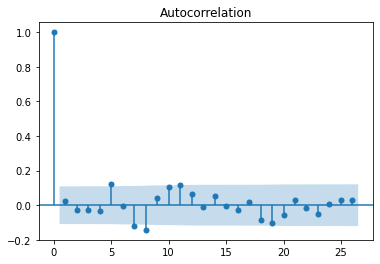

In [53]:
plot_acf(FinalResult_gram.resid);

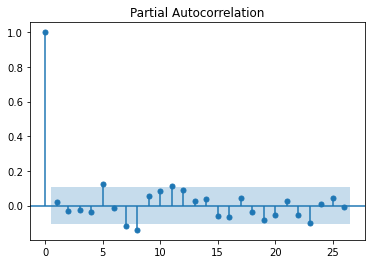

In [54]:
plot_pacf(FinalResult_gram.resid);

<AxesSubplot:xlabel='Date'>

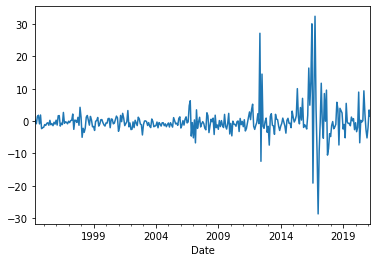

In [55]:
FinalResult_gram.resid.plot()

<AxesSubplot:ylabel='Frequency'>

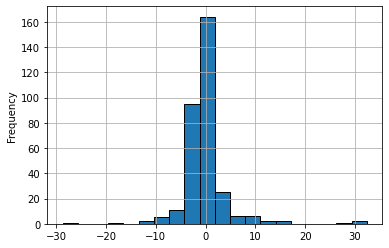

In [56]:
FinalResult_gram.resid.plot.hist(bins=20,grid=True,edgecolor='k')

##### Normality test

In [57]:
stats.kstest(FinalResult_gram.resid.values, 'norm') # Kolmogorov-Smirnov test

KstestResult(statistic=0.25234915551971204, pvalue=1.2934663273874694e-18)

In [58]:
stats.shapiro(FinalResult_gram.resid)      # Shapiro wilk test

ShapiroResult(statistic=0.68197101354599, pvalue=3.1951830806302346e-24)

In [59]:
from statsmodels.graphics.tsaplots import quarter_plot, month_plot

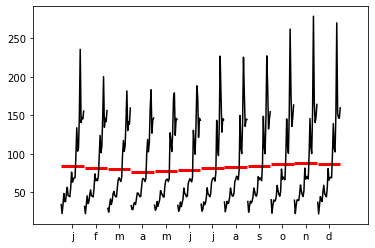

In [60]:
month_plot(df['Gram']);

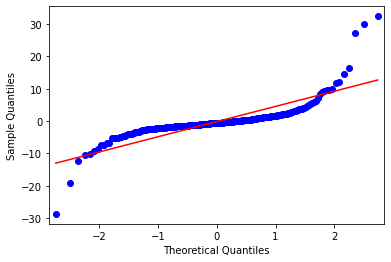

In [61]:
import numpy as np
import statsmodels.api as sm
import pylab


sm.qqplot(FinalResult_gram.resid, line='s');

In [62]:
sm.stats.diagnostic.acorr_ljungbox(FinalResult_gram.resid, lags=[30],return_df=True)

,lb_stat,lb_pvalue
30,41.967424,0.072035


# ARIMA-GARCH

In [63]:
sm.stats.diagnostic.het_arch(FinalResult_gram.resid, nlags=20)

(127.99439752950376,
 9.260544057147806e-18,
 10.312361316948445,
 9.470454666729646e-24)

In [64]:
resid= FinalResult_gram.resid

In [65]:
resid

Date
1994-05-01    0.191935
1994-06-01   -0.845927
1994-07-01    1.429110
1994-08-01    1.772779
1994-09-01   -0.897733
                ...   
2020-11-01   -2.619399
2020-12-01   -5.222936
2021-01-01   -2.001391
2021-02-01    3.417830
2021-03-01    1.482765
Freq: MS, Length: 323, dtype: float64

In [66]:
resid_train = resid.iloc[:311]
resid_test = resid.iloc[311:]

In [67]:
from arch import arch_model

In [68]:
model_garch = arch_model(resid_train , mean='constant', vol='GARCH', p=1, q=1)
results_garch = model_garch.fit(update_freq = 5)
results_garch.summary()

Iteration:      5,   Func. Count:     33,   Neg. LLF: 783.4950167516931
Optimization terminated successfully    (Exit mode 0)
            Current function value: 783.4752465195899
            Iterations: 9
            Function evaluations: 52
            Gradient evaluations: 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                   None   R-squared:                      -0.012
Mean Model:             Constant Mean   Adj. R-squared:                 -0.012
Vol Model:                      GARCH   Log-Likelihood:               -783.475
Distribution:                  Normal   AIC:                           1574.95
Method:            Maximum Likelihood   BIC:                           1589.91
                                        No. Observations:                  311
Date:                Sat, Jul 03 2021   Df Residuals:                      307
Time:                        10:23:35   Df Model:                            4
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            -0.7229      0.292     -2.476  1.328e-02 [ -1.295, -0.151]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.4276      1.128      0.379      0.705    [ -1.782,  2.637]
alpha[1]       0.2188      0.117      1.866  6.200e-02 [-1.098e-02,  0.449]
beta[1]        0.7812      0.122      6.418  1.385e-10    [  0.543,  1.020]
===========================================================================

Covariance estimator: robust
"""

In [69]:
rolling_predictions = []
test_size = 12

for i in range(test_size):
    train = resid[:-(test_size-i)]
    model = arch_model(train, mean='constant', vol='GARCH', p=1, q=1)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

In [70]:
rolling_predictions = pd.Series(rolling_predictions, index=resid.index[-12:])

In [247]:
rolling_predictions

Date
2020-04-01    2.365123
2020-05-01    4.939108
2020-06-01    5.245501
2020-07-01    4.729176
2020-08-01    4.266858
2020-09-01    3.876329
2020-10-01    5.731528
2020-11-01    5.308455
2020-12-01    4.864868
2021-01-01    4.854872
2021-02-01    4.426807
2021-03-01    4.406744
Freq: MS, dtype: float64

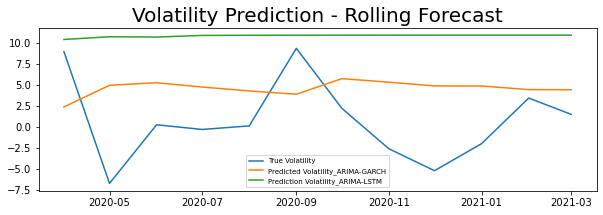

In [246]:
plt.figure(figsize=(10,3))
true, = plt.plot(resid_test)
preds, = plt.plot(rolling_predictions)
pred, = plt.plot(test_resid['prediction'])
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Volatility', 'Predicted Volatility_ARIMA-GARCH','Prediction Volatility_ARIMA-LSTM'], fontsize=7)

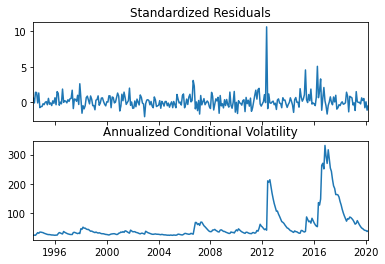

In [73]:
results_garch.plot(annualize='D');

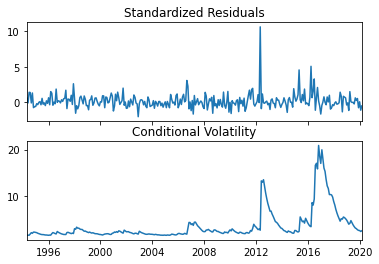

In [74]:
results_garch.plot();

## Normality Check

<AxesSubplot:ylabel='Frequency'>

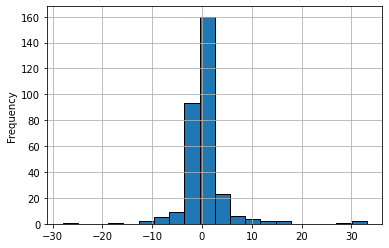

In [75]:
results_garch.resid.plot.hist(bins=20,grid=True,edgecolor='k')

In [76]:
stats.kstest(results_garch.std_resid.values, 'norm') # Kolmogorov-Smirnov test

KstestResult(statistic=0.1377453710707561, pvalue=1.3103359458907389e-05)

In [77]:
stats.shapiro(results_garch.std_resid)      # Shapiro wilk test

ShapiroResult(statistic=0.7665534019470215, pvalue=1.0090683396274186e-20)

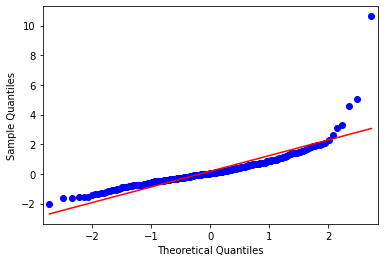

In [78]:
import numpy as np
import statsmodels.api as sm


sm.qqplot(results_garch.std_resid, line='s');

In [79]:
sm.stats.diagnostic.acorr_ljungbox(results_garch.resid, lags=[15], return_df=True)

,lb_stat,lb_pvalue
15,26.466039,0.0334


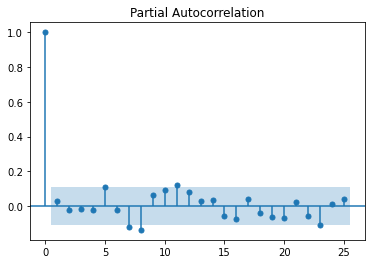

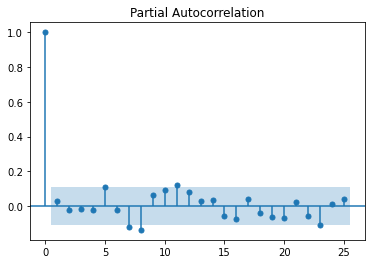

In [80]:
plot_pacf(results_garch.resid)

<AxesSubplot:xlabel='Date'>

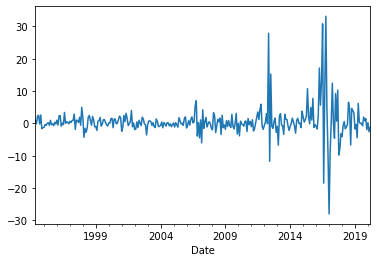

In [81]:
results_garch.resid.plot()

In [82]:
test

,Gram,Arhar,Moong,Masur,Urad,ARIMA_predistion
Date,,,,,,
2020-04-01,146.7,155.7,174.2,149.7,180.6,136.669344
2020-05-01,144.8,157.0,179.7,150.8,187.7,136.558448
2020-06-01,143.8,158.6,176.1,155.1,184.0,137.535633
2020-07-01,144.3,160.1,173.6,157.5,181.7,138.094302
2020-08-01,144.8,160.9,170.4,158.0,180.9,139.661767
2020-09-01,154.8,165.8,164.3,159.0,177.6,140.840682
2020-10-01,163.6,173.6,162.6,162.8,181.5,141.903097
2020-11-01,164.3,174.5,165.1,166.3,188.1,143.535162
2020-12-01,159.8,169.1,168.5,163.8,191.0,144.376773


In [83]:
prediction_gram

2020-04-01    136.669344
2020-05-01    136.558448
2020-06-01    137.535633
2020-07-01    138.094302
2020-08-01    139.661767
2020-09-01    140.840682
2020-10-01    141.903097
2020-11-01    143.535162
2020-12-01    144.376773
2021-01-01    145.689919
2021-02-01    146.897699
2021-03-01    147.648079
Freq: MS, Name: ARIMA(4,1,3)-predictions, dtype: float64

In [84]:
predicted_mu = result_gram.forecast()[0]

In [85]:
predicted_mu

array([136.66934416])

In [86]:
garch_forecast = results_garch.forecast(horizon=1)

In [87]:
predicted_et = garch_forecast.mean['h.1'].iloc[-1]

In [88]:
predicted_et

-0.7228647504939499

In [89]:
prediction = predicted_mu+predicted_et

In [90]:
prediction_GARCH = prediction_gram+rolling_predictions

In [91]:
prediction_GARCH

2020-04-01    139.034467
2020-05-01    141.497556
2020-06-01    142.781135
2020-07-01    142.823478
2020-08-01    143.928625
2020-09-01    144.717011
2020-10-01    147.634625
2020-11-01    148.843617
2020-12-01    149.241641
2021-01-01    150.544791
2021-02-01    151.324507
2021-03-01    152.054823
Freq: MS, dtype: float64

In [92]:
rmse(test['Gram'],prediction_GARCH)

8.601467844435726

In [93]:
prediction_GARCH.shape

(12,)

In [94]:
test['Gram'].shape

(12,)

In [95]:
prediction_gram.shape

(12,)

In [96]:
mse(test['Gram'],prediction_GARCH)

73.98524907886178

In [97]:
from diebold_mariano_test import cul_d_t,MAE,MSE,cul_DM,cul_P

In [98]:
dm = cul_d_t(MAE,test['Gram'],prediction_gram,prediction_GARCH)

In [99]:
cul_DM(dm)

19.259711440420542

In [100]:
cul_P(dm)

1.1702887553351479e-82

In [101]:
MAE(3,test['Gram'],prediction_gram)

6.264366719781464

In [102]:
dm1=cul_d_t(MAE,test['Gram'],prediction_GARCH,prediction_gram)

In [103]:
cul_DM(dm1)

-19.259711440420542

In [104]:
test['GARCH_prediction']= prediction_GARCH

# ARIMA-LSTM

### Lag estimation

In [210]:
from statsmodels.tsa.stattools import acf
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot
from pandas import DataFrame

In [242]:
acf(FinalResult_gram.resid**2,nlags=12,qstat=True)

(array([1.        , 0.23557632, 0.22347931, 0.61262342, 0.10637246,
        0.11221097, 0.34406691, 0.04335195, 0.03796746, 0.14387201,
        0.0085187 , 0.02813537, 0.054389  ]),
 array([ 18.09227944,  34.4248855 , 157.54332386, 161.26684326,
        165.42335891, 204.6257401 , 205.25007276, 205.7304677 ,
        212.65051151, 212.67484967, 212.94118982, 213.93968867]),
 array([2.10453038e-05, 3.34758100e-08, 6.21259218e-34, 7.82020123e-34,
        6.90780479e-34, 1.96519049e-41, 8.86491539e-41, 3.95892659e-40,
        7.33680732e-41, 3.64137635e-40, 1.52284426e-39, 4.27855807e-39]))

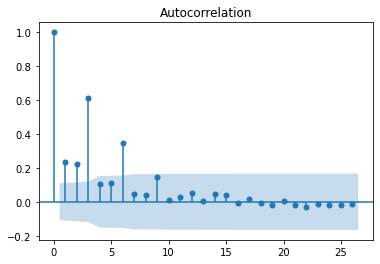

In [211]:
plot_acf(FinalResult_gram.resid**2);

In [212]:
df['resid'] = FinalResult_gram.resid**2

In [213]:
df

,Gram,Arhar,Moong,Masur,Urad,resid
Date,,,,,,
1994-04-01,32.83,35.10,25.21,28.99,28.64,NaN
1994-05-01,33.48,34.55,25.42,28.84,30.09,0.036839
1994-06-01,33.19,35.24,25.03,30.31,29.96,0.715592
1994-07-01,34.65,36.14,23.92,32.58,31.39,2.042354
1994-08-01,37.51,36.86,23.66,33.79,32.48,3.142744
...,...,...,...,...,...,...
2020-11-01,164.30,174.50,165.10,166.30,188.10,6.861251
2020-12-01,159.80,169.10,168.50,163.80,191.00,27.279056
2021-01-01,155.60,166.80,166.70,165.40,194.00,4.005568


In [214]:
mylist= ['resid']

df1 = df[mylist][1:]
df1.head()

,resid
Date,
1994-05-01,0.036839
1994-06-01,0.715592
1994-07-01,2.042354
1994-08-01,3.142744
1994-09-01,0.805924


In [228]:
dataframe = DataFrame()
for i in range(9,0,-1):
    dataframe['t-'+str(i)] = df1.shift(i).values[:,0]
dataframe['t'] = df1.values[:,0]
print(dataframe.head(10))
dataframe = dataframe[10:]

        t-9       t-8       t-7       t-6       t-5       t-4       t-3  \
0       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
3       NaN       NaN       NaN       NaN       NaN       NaN  0.036839   
4       NaN       NaN       NaN       NaN       NaN  0.036839  0.715592   
5       NaN       NaN       NaN       NaN  0.036839  0.715592  2.042354   
6       NaN       NaN       NaN  0.036839  0.715592  2.042354  3.142744   
7       NaN       NaN  0.036839  0.715592  2.042354  3.142744  0.805924   
8       NaN  0.036839  0.715592  2.042354  3.142744  0.805924  3.441944   
9  0.036839  0.715592  2.042354  3.142744  0.805924  3.441944  5.552630   

        t-2       t-1         t  
0       NaN       NaN  0.036839  
1       NaN  0.036839  0.715592  
2  0.036839  0.715592  2.042354  
3  0.715592  2.042354  3.142744  
4  2

In [230]:
dataframe.to_csv('lags_12months_features.csv', index=False)

In [231]:
dataframe = pd.read_csv('lags_12months_features.csv', header=0)
array = dataframe.values

In [232]:
X = array[:,0:-1]
y = array[:,-1]

In [233]:
model = RandomForestRegressor(n_estimators=100, random_state=1)
model.fit(X, y)

RandomForestRegressor(random_state=1)

In [234]:
print(model.feature_importances_)

[0.03310297 0.09534721 0.09854111 0.05981243 0.01750637 0.00902432
 0.51936637 0.04251423 0.12478499]


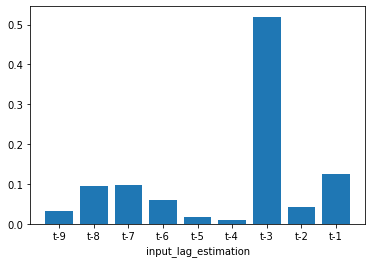

In [235]:
names = dataframe.columns.values[0:-1]
ticks = [i for i in range(len(names))]
pyplot.bar(ticks, model.feature_importances_)
pyplot.xticks(ticks, names)
pyplot.xlabel('input_lag_estimation')
pyplot.show()

In [117]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 323 entries, 1994-05-01 to 2021-03-01
Freq: MS
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   resid   323 non-null    float64
dtypes: float64(1)
memory usage: 5.0 KB


In [118]:
train_resid = df1.iloc[:311]
test_resid = df1.iloc[311:]

In [119]:
from sklearn.preprocessing import MinMaxScaler

In [120]:
scaler = MinMaxScaler()
scaler.fit(train_resid)

MinMaxScaler()

In [121]:
scaled_train = scaler.transform(train_resid)
scaled_test = scaler.transform(test_resid)

In [122]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [188]:
# Define the generator
n_input = 3 # how many data will estimate the next time stand value.
n_features = 1

train_generator = TimeseriesGenerator(scaled_train,scaled_train,length=n_input,batch_size=1)

In [189]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.utils import plot_model

In [190]:
model = Sequential()

model.add(LSTM(66, activation='relu', input_shape =(n_input,n_features)))    #relu = rectified linear unit
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

In [191]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 66)                17952     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 67        
Total params: 18,019
Trainable params: 18,019
Non-trainable params: 0
_________________________________________________________________


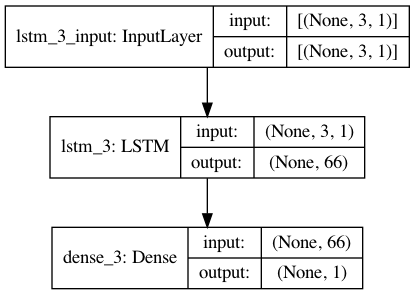

In [192]:
plot_model(model,show_shapes=True)

In [193]:
model.fit(train_generator, epochs=25)

Epoch 1/25
308/308 [==============================] - 0s 1ms/step - loss: 0.0100
Epoch 2/25
308/308 [==============================] - 0s 1ms/step - loss: 0.0092
Epoch 3/25
308/308 [==============================] - 0s 1ms/step - loss: 0.0086
Epoch 4/25
308/308 [==============================] - 0s 1ms/step - loss: 0.0081
Epoch 5/25
308/308 [==============================] - 0s 1ms/step - loss: 0.0075
Epoch 6/25
308/308 [==============================] - 0s 1ms/step - loss: 0.0077
Epoch 7/25
308/308 [==============================] - 0s 1ms/step - loss: 0.0067
Epoch 8/25
308/308 [==============================] - 0s 1ms/step - loss: 0.0075
Epoch 9/25
308/308 [==============================] - 0s 1ms/step - loss: 0.0070
Epoch 10/25
308/308 [==============================] - 0s 1ms/step - loss: 0.0072
Epoch 11/25
308/308 [==============================] - 0s 1ms/step - loss: 0.0071
Epoch 12/25
308/308 [==============================] - 0s 1ms/step - loss: 0.0071
Epoch 13/25
308/308 [====

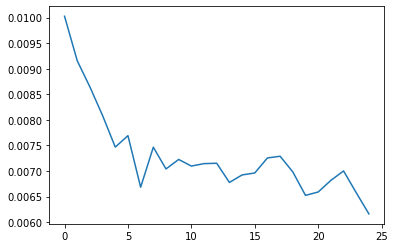

In [194]:
myloss = model.history.history['loss']

plt.plot(range(len(myloss)),myloss)

In [195]:
# Holding my prediction
test_prediction = []

# Last n_input point from the train set
first_eval_batch= scaled_train[-n_input:]

# Reshape this to the RNN format. same as TimeSeriesGenarator
current_batch = first_eval_batch.reshape((1,n_input,n_features))

# How far will we forecast?

for i in range(len(test)):
    current_pred = model.predict(current_batch)[0]
    
    test_prediction.append(current_pred)
    
    current_batch= np.append(current_batch[:,1:],[[current_pred]],axis=1)

In [196]:
test_prediction

[array([0.00990271], dtype=float32),
 array([0.01021307], dtype=float32),
 array([0.01017763], dtype=float32),
 array([0.01036184], dtype=float32),
 array([0.01038051], dtype=float32),
 array([0.01038409], dtype=float32),
 array([0.01039338], dtype=float32),
 array([0.01039467], dtype=float32),
 array([0.01039511], dtype=float32),
 array([0.0103956], dtype=float32),
 array([0.01039569], dtype=float32),
 array([0.01039572], dtype=float32)]

In [197]:
true_prediction = scaler.inverse_transform(test_prediction)

In [198]:
true_prediction

array([[10.38939803],
       [10.71501211],
       [10.67783375],
       [10.87109675],
       [10.89068159],
       [10.89444242],
       [10.90418599],
       [10.90553535],
       [10.90599947],
       [10.90651147],
       [10.90660429],
       [10.90663947]])

In [199]:
test_resid['resid']

Date
2020-04-01    79.939787
2020-05-01    45.309190
2020-06-01     0.059316
2020-07-01     0.100066
2020-08-01     0.011866
2020-09-01    87.085379
2020-10-01     4.828716
2020-11-01     6.861251
2020-12-01    27.279056
2021-01-01     4.005568
2021-02-01    11.681564
2021-03-01     2.198591
Freq: MS, Name: resid, dtype: float64

In [250]:
test_resid['prediction Volatility ARIMA-LSTM(Random_Forest)'] = true_prediction

In [253]:
test_resid['Prediction Volatility ARIMA-GARCH']= rolling_predictions
test_resid['true Volatility']= resid_test
test_resid.to_csv('Gram volatility.csv')

In [202]:
test['ARIMA-LSTM_Pred']= test['ARIMA_predistion']+test_resid['prediction']

In [203]:
test

,Gram,Arhar,Moong,Masur,Urad,ARIMA_predistion,GARCH_prediction,ARIMA-LSTM_Pred
Date,,,,,,,,
2020-04-01,146.7,155.7,174.2,149.7,180.6,136.669344,139.034467,147.058742
2020-05-01,144.8,157.0,179.7,150.8,187.7,136.558448,141.497556,147.273460
2020-06-01,143.8,158.6,176.1,155.1,184.0,137.535633,142.781135,148.213467
2020-07-01,144.3,160.1,173.6,157.5,181.7,138.094302,142.823478,148.965399
2020-08-01,144.8,160.9,170.4,158.0,180.9,139.661767,143.928625,150.552448
2020-09-01,154.8,165.8,164.3,159.0,177.6,140.840682,144.717011,151.735124
2020-10-01,163.6,173.6,162.6,162.8,181.5,141.903097,147.634625,152.807283
2020-11-01,164.3,174.5,165.1,166.3,188.1,143.535162,148.843617,154.440697
2020-12-01,159.8,169.1,168.5,163.8,191.0,144.376773,149.241641,155.282772


<AxesSubplot:xlabel='Date'>

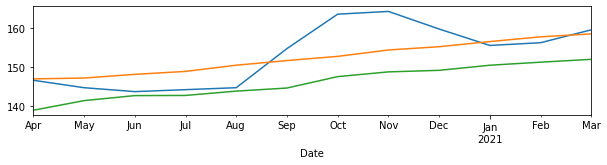

In [226]:
test['Gram'].plot(figsize=(10,2))
test['ARIMA-LSTM_Pred'].plot()
test['GARCH_prediction'].plot()

In [205]:
rmse(test['Gram'],test['ARIMA-LSTM_Pred'])

5.231457873280822

In [206]:
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [207]:
mean_absolute_percentage_error(test['Gram'],test['ARIMA-LSTM_Pred'])

2.657498306996872

In [254]:
test.to_csv('Gram_result with ARIMA-LSTM Random forecst.csv')